In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import *
import numpy as np
import warnings

In [18]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://' + postgres_user + ':' + postgres_pw + '@' + postgres_host + ':' + postgres_port + '/' + postgres_db)
df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [20]:
df.isnull().sum().sort_values(ascending=False)/len(df)

AVG_READING_8_SCORE             0.666220
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_MATH_4_SCORE                0.640751
OTHER_EXPENDITURE               0.176273
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_ALL_G                    0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
YEAR                            0.000000
STATE                           0.000000
PRIMARY_KEY     

In [21]:
df2 = df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

# Little pro-tip: always avoid inplace operations in Pandas. Inplace operations might work on copies not referencing the original dataframe
# and you end up with no changes in the original dataframe. 
# Most places where you do that end up with a `SettingWithCopy Warning`, but in this case, it isn't easily detectable.
# There are some Github issues about that problem: 
# https://github.com/pandas-dev/pandas/issues/14858
# https://github.com/pandas-dev/pandas/issues/11984
# https://github.com/pandas-dev/pandas/issues/10342 (this one is the easiest to understand)

# For example, this doesn't work:
# for col in fill_list:
#     education2_df.loc[:, col].fillna(education2_df.loc[:, col].mean(), inplace=True)

# But this does:     
for col in fill_list:
    df2.loc[:, col] = df2.loc[:, col].fillna(df2.loc[:, col].mean())

In [22]:
df3 = df.copy()

years = df3["YEAR"].unique()

for col in fill_list:
    for year in years:
        df3.loc[df3["YEAR"] == year, col] = df3.loc[df3["YEAR"] == year, col].fillna(
            df3[df3["YEAR"] == year][col].mean())

In [23]:
df4 = df.copy()

for col in fill_list:
    df4.loc[:, col] = df4.loc[:, col].interpolate()

In [24]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([df[col], df2[col],
                     df3[col], df4[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

KeyError: 'TOTAL_REVENUE'

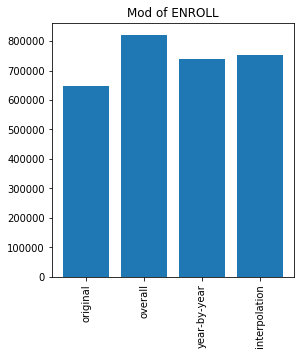

In [25]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([df[col], df2[col],
                     df3[col], df4[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()